In [96]:
import yfinance as yf
import numpy as np
import pandas as pd
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

In [29]:
%%script echo skipping 

# download data
tickers = ['S51', '5LY', 'G13', '579', 'BS6', 'C8R', 'Y92', 'T13', '5WH', 'OXMU',
           'Z74', 'NHD', 'A17U', '558', 'C38U', 'Q0X', 'BTOU', 'S08', 'LS9', 'DCRU', 'C6L']
tickers = list(map(lambda x: f'{x}.SI', tickers))
data = yf.download(tickers, start="2022-07-20", end="2023-07-20")
data.to_csv('data.csv')


skipping


In [13]:
data=pd.read_csv('data.csv',index_col=0,header=[0,1])

In [14]:
middle=(data.loc[:,'Open']+data.loc[:,'Close'])/2
pctchg=middle.pct_change().rename(columns={'Middle':'PctChg'})

<AxesSubplot: xlabel='Date'>

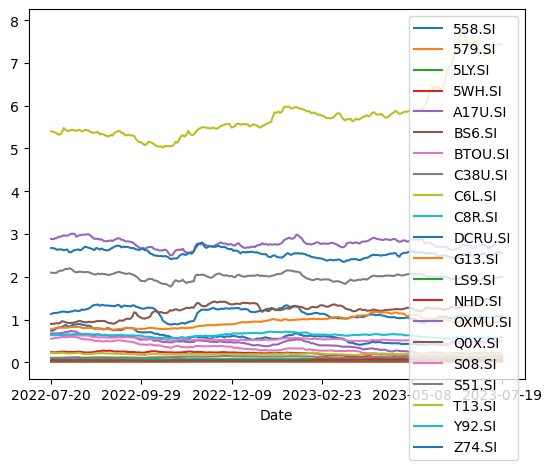

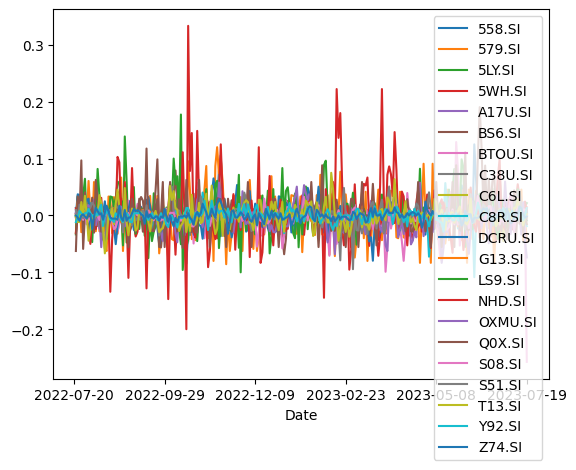

In [15]:
middle.plot()
pctchg.plot()

In [102]:
data_mean=pctchg.mean().to_numpy()
data_std=pctchg.std().to_numpy()
data_cov=pctchg.cov().to_numpy()
lo,hi=min(data_mean),max(data_mean)
rtns=np.linspace(lo,hi,20)

In [103]:
P=matrix(data_cov)
q=matrix(np.zeros_like(data_mean))
G=matrix(-np.eye(len(data_mean)))
h=matrix(np.zeros_like(data_mean))
A=matrix(np.array([np.ones_like(data_mean),data_mean]))
b=matrix(np.array([1,0.00338]))

In [104]:
risks=[]
for rtn in rtns:
    b=matrix(np.array([1,rtn]))
    res=solvers.qp(P,q,G,h,A,b)
    risks.append(res['primal objective']**(1/2))

     pcost       dcost       gap    pres   dres
 0:  1.6334e-04 -9.9976e-01  3e+01  5e+00  6e+00
 1:  1.9141e-04 -5.2852e-01  3e+00  4e-01  4e-01
 2:  3.0660e-04 -4.9062e-03  3e-01  5e-02  6e-02
 3:  4.0985e-04 -7.5325e-04  1e-02  2e-03  2e-03
 4:  4.1137e-04  3.9974e-04  1e-04  2e-05  2e-05
 5:  4.1139e-04  4.1127e-04  1e-06  2e-07  2e-07
 6:  4.1139e-04  4.1139e-04  1e-08  2e-09  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4262e-04 -1.0221e+00  3e+01  5e+00  6e+00
 1:  1.6482e-04 -6.0834e-01  2e+00  3e-01  4e-01
 2:  2.5508e-04 -1.0740e-01  4e-01  5e-02  5e-02
 3:  3.2167e-04 -5.7379e-02  6e-02  6e-15  2e-15
 4:  3.2155e-04 -4.0166e-04  7e-04  3e-14  1e-15
 5:  3.1213e-04  1.7733e-04  1e-04  4e-15  2e-16
 6:  2.6090e-04  2.0475e-04  6e-05  1e-16  2e-18
 7:  2.5088e-04  2.4460e-04  6e-06  2e-16  2e-18
 8:  2.4863e-04  2.4639e-04  2e-06  6e-16  8e-19
 9:  2.4699e-04  2.4642e-04  6e-07  2e-16  1e-18
10:  2.4660e-04  2.4659e-04  7e-09  2e-16  7e-1

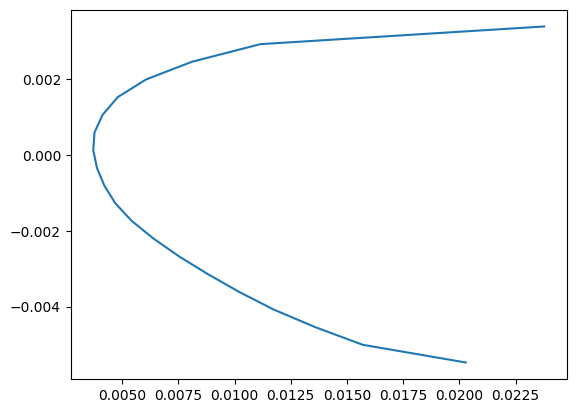

In [105]:
fig,ax=plt.subplots()
ax.plot(risks,rtns)